In [23]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
from pylab import *

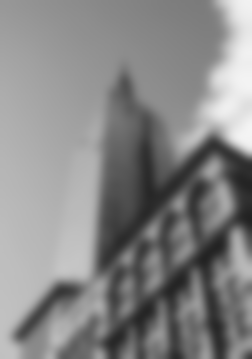

In [24]:
# 对图像进行模糊处理（通过高斯变换）
# 灰度图像
im = array(Image.open('demo.jpg').convert('L'))
im2 = filters.gaussian_filter(im,5)# 最后一个参数表示标准差，该值越大，处理后的图像细节丢失越多，图像就越模糊。

Image.fromarray(uint8(im2))

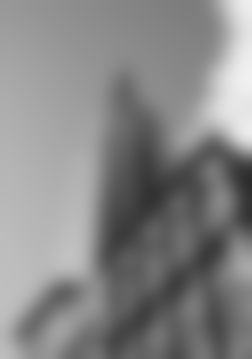

In [29]:
im3 = filters.gaussian_filter(im,10)
Image.fromarray(uint8(im3))

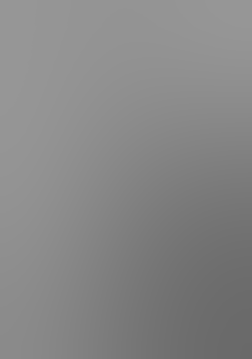

In [31]:
im3 = filters.gaussian_filter(im,100)
Image.fromarray(uint8(im3))

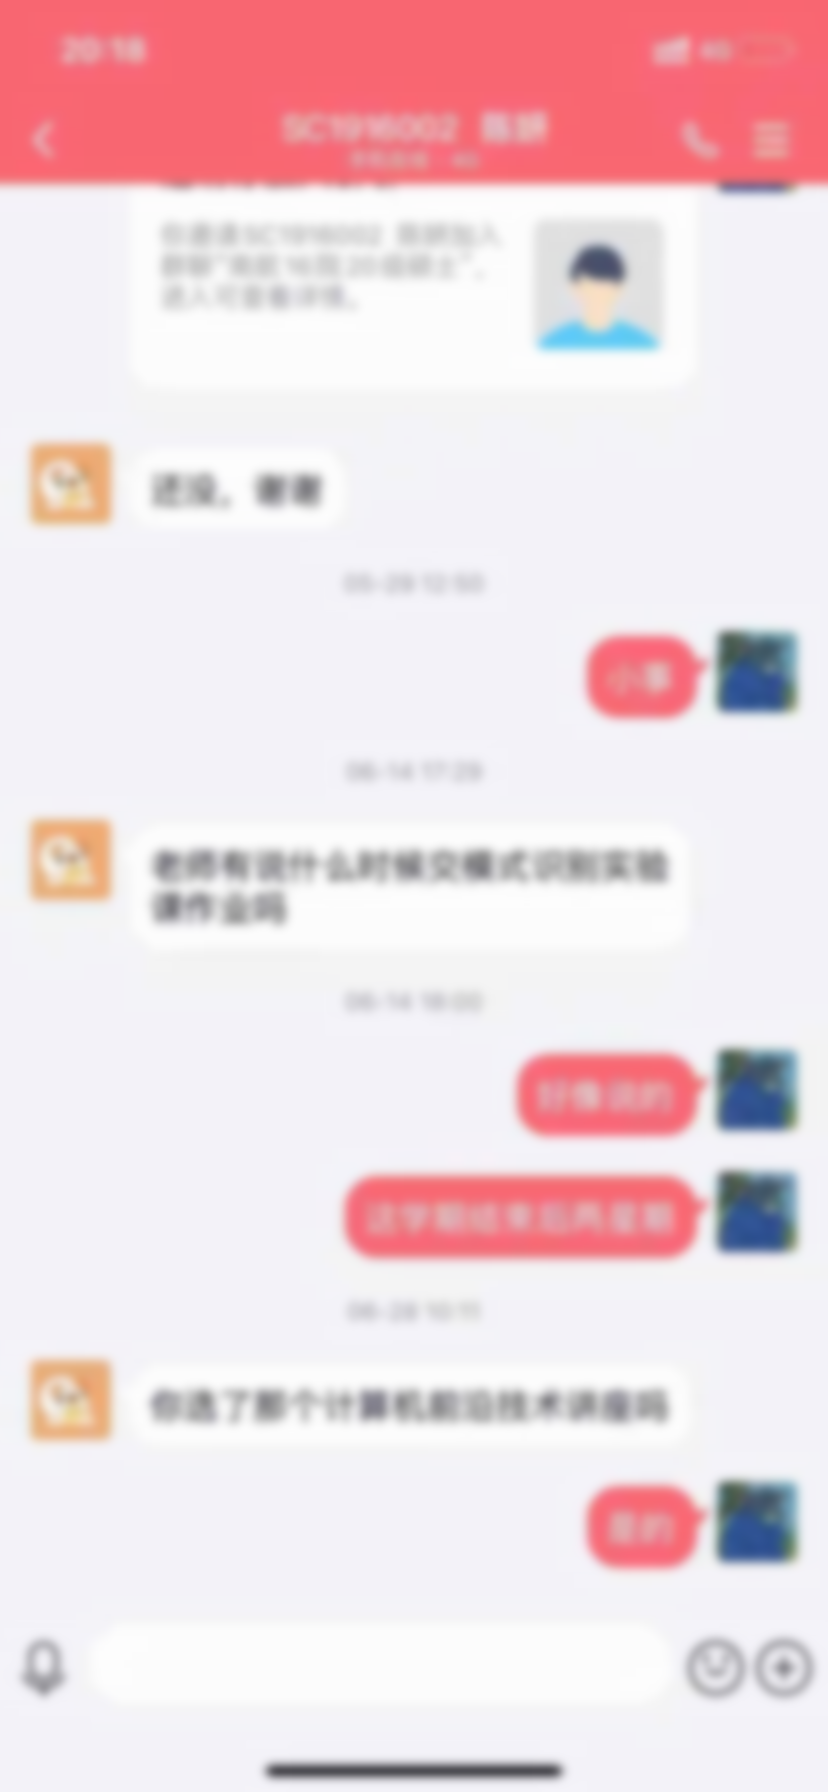

In [34]:
# 彩色图像
# 对彩色图像做灰度处理，只需要对某一个通道进行高斯模糊处理即可
im = array(Image.open('demo2.jpg'))
im2 = zeros(im.shape)# 初始化待“赋值”图像
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
Image.fromarray(uint8(im2))

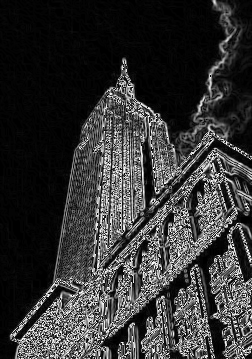

In [46]:
# 图像导数
im = array(Image.open('demo.jpg').convert('L'))

# Sobel导数滤波器

# sobel()函数的第二个参数表示选择 x 或者 y 方向导数，第三个参数保存输出的变量
# 在两个导数图像中，正导数显示为亮的像素，负导数显示为暗的像素。灰色区域表示导数的值接近于零。

# 计算x方向的导数
imx = zeros(im.shape)
filters.sobel(im,1,imx)
Image.fromarray(uint8(imx))
# Image.open('demo.jpg')

# 计算y方向的导数
imy = zeros(im.shape)
filters.sobel(im,0,imy)
Image.fromarray(uint8(imy))

# 梯度大小图像
magnitude = sqrt(imx**2 + imy**2)
Image.fromarray(uint8(magnitude))

In [57]:
# 高斯导数滤波器
sigma = 1# 设置使用的标准差

imx = zeros(im.shape)
filters.gaussian_filter(im,(sigma,sigma),(0,1),imx)# 计算x方向的导数

imy = zeros(im.shape)
filters.gaussian_filter(im,(sigma,sigma),(1,0),imy)# 计算y方向的导数

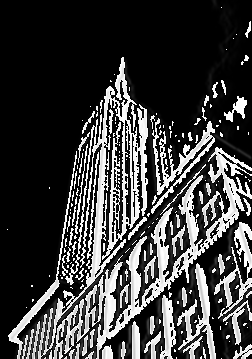

In [58]:
Image.fromarray(uint8(imx))

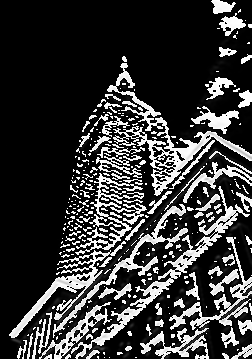

In [60]:
Image.fromarray(uint8(imy))

In [68]:
# 形态学：对象计数
from PIL import Image
from numpy import *
from scipy.ndimage import measurements,morphology

In [92]:
im = array(Image.open('demo.jpg').convert('L'))
# 进行二值化处理：像素值＜128的设置为取为1，＞128的取为0
im = 1*(im<128)

labels,nbr_objects = measurements.label(im)
labels

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ..., 181, 181, 181],
       [  0,   0,   0, ..., 181, 181, 181],
       [  0,   0,   0, ..., 181, 181, 181]], dtype=int32)

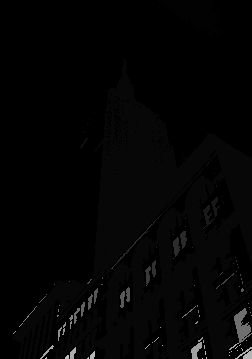

In [93]:
Image.fromarray(uint8(labels))

In [97]:
# 使用形态学开操作分离各个对象

# 第二个参数指定一个数组结构元素，数组表示以一个像素为中心时，使用哪些相邻像素
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)
labels_open,nbr_objects_open = measurements.label(im_open)
labels_open
nbr_objects_open

13

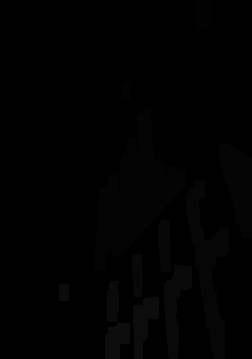

In [99]:
Image.fromarray(uint8(labels_open))

In [101]:
import scipy

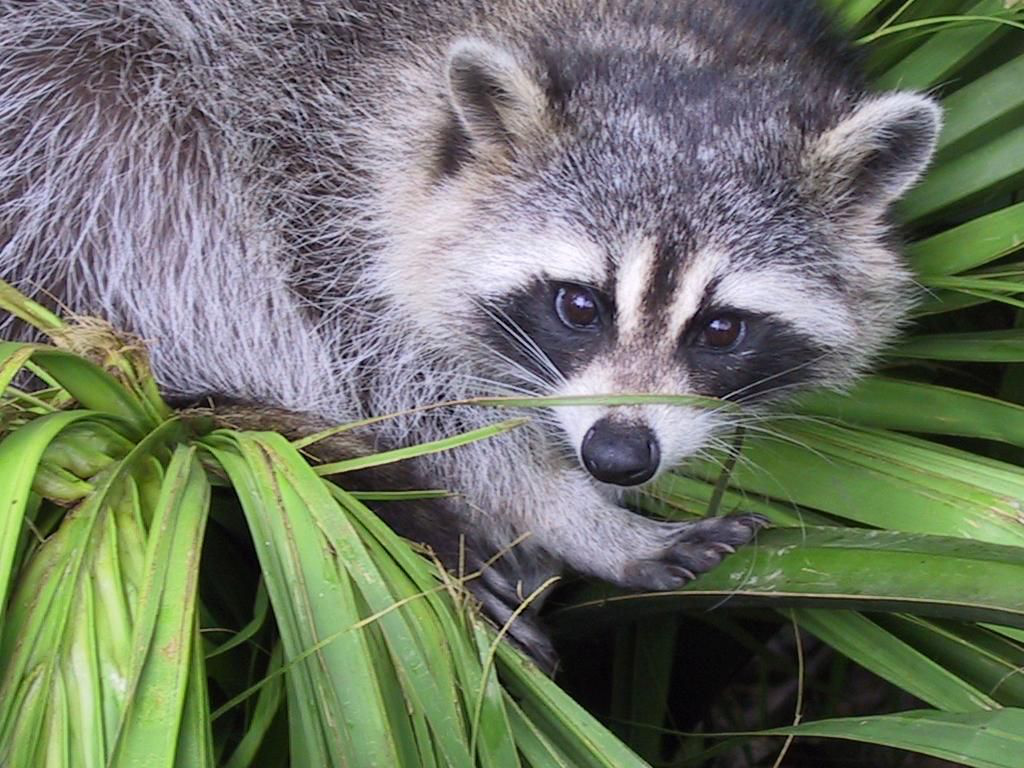

In [105]:
lena = scipy.misc.face()
Image.fromarray(uint8(lena))